# Data Analysis Interview Challenge
This is your chance to wow us with creative and rigorous solutions! Please include your code at
the end of your submission, or in a separate file. We also accept incomplete solutions.
### Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


In [10]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

import warnings
warnings.filterwarnings("ignore")

#### Load Dataframe

In [11]:
login_df = pd.read_json('logins.json')
login_df.describe()

,login_time
count,93142
mean,1970-02-26 19:09:39.779648278
min,1970-01-01 20:12:16
25%,1970-02-04 10:37:19.750000
50%,1970-03-01 06:33:05.500000
75%,1970-03-22 04:01:10.750000
max,1970-04-13 18:57:38


In [12]:
#check for null values
login_df.isna().sum()

login_time    0
dtype: int64

In [13]:
login_df['login_time'] = pd.to_datetime(login_df['login_time'])
login_df.index = login_df['login_time']
login_df['count'] = 1

In [14]:
login_df = pd.DataFrame(login_df['count'].resample('15Min').sum())
login_df.columns

Index(['count'], dtype='object')

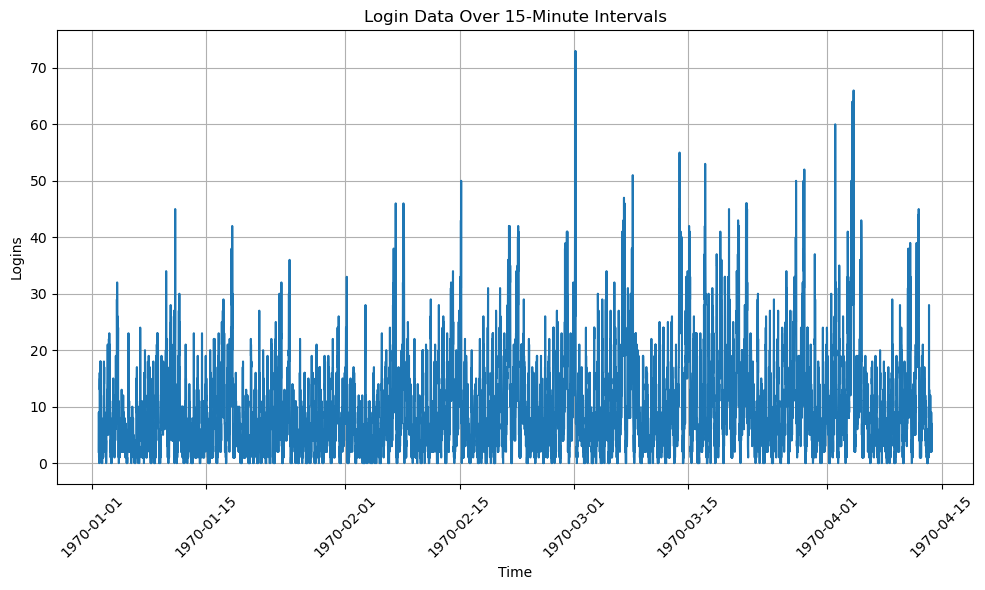

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(login_df.index, login_df['count'], linestyle='-')
plt.title('Login Data Over 15-Minute Intervals')
plt.xlabel('Time')
plt.ylabel('Logins')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

##### We can see peaks in the chart above. Lets dive deeper into what the peaks are

In [16]:
# Reload dataframe
login_df = pd.read_json('logins.json')

# Convert 'login_time' column to datetime if it's not already
login_df['login_time'] = pd.to_datetime(login_df['login_time'])

# Set 'login_time' column as index
login_df.set_index('login_time', inplace=True)

# Sort the index to ensure it's monotonic
login_df.sort_index(inplace=True)

# Split by month into new dataframes
jan_df = login_df['1970-01-01': '1970-01-31'].reset_index(drop=False)
feb_df = login_df['1970-02-01': '1970-02-28'].reset_index(drop=False)
mar_df = login_df['1970-03-01': '1970-03-31'].reset_index(drop=False)
apr_df = login_df['1970-04-01': '1970-04-30'].reset_index(drop=False)

# Show example
print('January df sample:\n\n{}'.format(jan_df.head()))

January df sample:

           login_time
0 1970-01-01 20:12:16
1 1970-01-01 20:13:18
2 1970-01-01 20:16:10
3 1970-01-01 20:16:36
4 1970-01-01 20:16:37


In [17]:
# Create new day of week feature to aggregate on
month_list = [jan_df, feb_df, mar_df, apr_df]

for month_df in month_list:
    month_df['day_of_week'] = month_df['login_time'].map(lambda x: x.weekday())
    
# Show example
print('January df sample:\n\n{}'.format(jan_df.head()))

January df sample:

           login_time  day_of_week
0 1970-01-01 20:12:16            3
1 1970-01-01 20:13:18            3
2 1970-01-01 20:16:10            3
3 1970-01-01 20:16:36            3
4 1970-01-01 20:16:37            3


##### Function for Plotting Trends of Logins

In [18]:
def show_trends(df, title, weekends=False):
    new_df = df.set_index('login_time')

    for day in sorted(list(new_df['day_of_week'].unique())):

        temp = new_df[new_df['day_of_week'] == day]
        temp.drop('day_of_week', axis=1, inplace=True)
        temp['count'] = 1
        temp = temp.resample('15T').sum()
        
        if weekends == True:
            if day in [0,1,2,3,4]:
                color = 'blue'
            else:
                color = 'red'
            plt.plot(temp, color=color)
            plt.title(title)
            plt.xticks(rotation=45)
         
        else:
            plt.plot(temp)
            plt.title(title)
            plt.xticks(rotation=45)

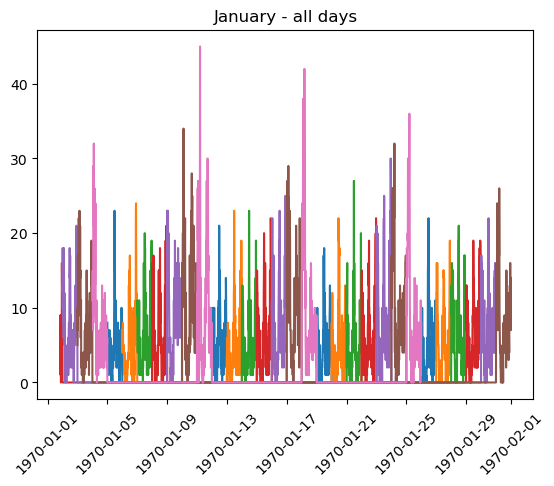

In [19]:
#Plotting All Days for January
show_trends(jan_df, title='January - all days')

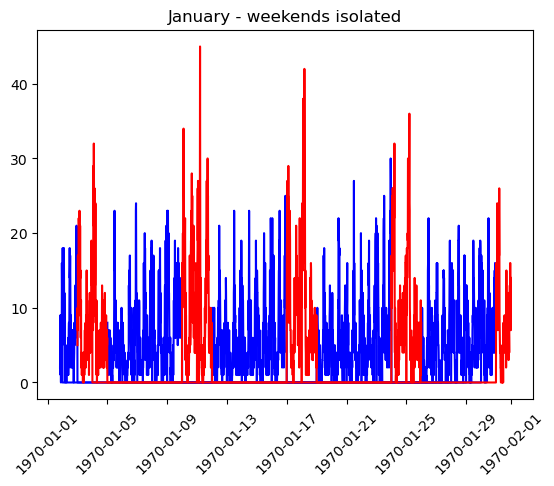

In [21]:
#Plotting Just Weekends in January
show_trends(jan_df, title='January - weekends isolated', weekends=True)


##### Looking at the chart above we can conclude that weekends tend to have higher rates of login versus the weekdays

### Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2) Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a) how you will implement the experiment
b) what statistical test(s) you will conduct to verify the significance of the
observation
c) how you would interpret the results and provide recommendations to the city
operations team along with any caveats.
Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do
not need this information to answer Part 2.


#### Solution:

1. Key Measure of Success:
The key measure of success for this experiment would be the increase in the number of trips made by driver partners between the two cities after toll reimbursement. This metric directly reflects the behavior change desired by the Ultimate managers – encouraging driver partners to serve both cities rather than being exclusive to one. An increase in inter-city trips would indicate that the toll reimbursement incentive is effective in promoting cross-city mobility among driver partners.

Reasoning:
By focusing on the number of trips between the two cities, we can directly assess the impact of the toll reimbursement policy on driver behavior. If the policy successfully encourages driver partners to serve both cities, we would expect to see a significant increase in the frequency of trips crossing the toll bridge.

Practical Experiment Design:
a) Implementation:

Pre-Implementation Data Collection: Collect historical data on the number of trips made between Gotham and Metropolis by driver partners before the toll reimbursement policy is implemented. This will serve as the baseline for comparison.
Implementation of Toll Reimbursement Policy: Introduce the toll reimbursement policy and communicate it to all driver partners operating in Gotham and Metropolis.
Post-Implementation Data Collection: After a suitable period (e.g., one month) post-implementation, collect data on the number of trips made between the two cities by driver partners.
b) Statistical Test:
Conduct a hypothesis test to compare the mean number of trips between the two cities before and after the implementation of the toll reimbursement policy. A paired t-test would be appropriate for this analysis, as it compares the means of two related samples (i.e., before and after implementation). The null hypothesis (H0) would be that there is no significant difference in the mean number of trips before and after the policy change, while the alternative hypothesis (H1) would be that there is a significant increase in the mean number of trips after the policy change.

c) Interpretation of Results and Recommendations:

If the p-value from the paired t-test is less than the significance level (e.g., α = 0.05), we reject the null hypothesis, indicating a significant increase in the mean number of trips between the two cities after the toll reimbursement policy implementation.
In such a case, we would recommend continuing the toll reimbursement policy as it effectively encourages driver partners to serve both cities, thereby improving overall mobility and potentially reducing congestion.

### Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

#### Data description
● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE



● weekday_pct: the percent of the user’s trips occurring during a weekday

In [32]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [33]:
#check for nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [34]:
#impute null values found 
df.avg_rating_by_driver = df.avg_rating_by_driver.fillna(df.avg_rating_by_driver.mean())
df.avg_rating_of_driver = df.avg_rating_of_driver.fillna(df.avg_rating_of_driver.mean())

##### Create Target Variable 

In [35]:
#create date objects
df.signup_date = pd.to_datetime(df.signup_date)
df.last_trip_date = pd.to_datetime(df.last_trip_date)

In [36]:
# Encode target variable 'active' as true or false for last trip in June
df['active'] = (df['last_trip_date'].dt.month >= 6).astype(int)

# Encode 'ultimate_black_user' as categorical
df['ultimate_black_user'] = df['ultimate_black_user'].astype(int)

# Drop unnecessary columns
df.drop(['last_trip_date', 'signup_date'], axis=1, inplace=True)

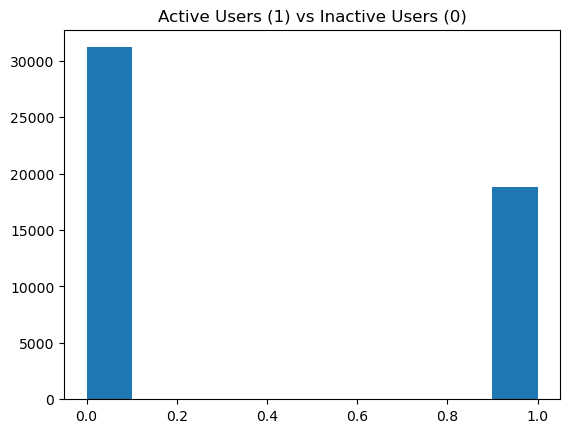

Percent of Active Users: 37.61%


In [64]:
# Plot histogram of active users
plt.hist(df['active'])
plt.title('Active Users (1) vs Inactive Users (0)')
plt.show()

# Calculate and print the percentage of active users
percent_active = df['active'].mean() * 100
print(f'Percent of Active Users: {percent_active:.2f}%')


##### Building a Model

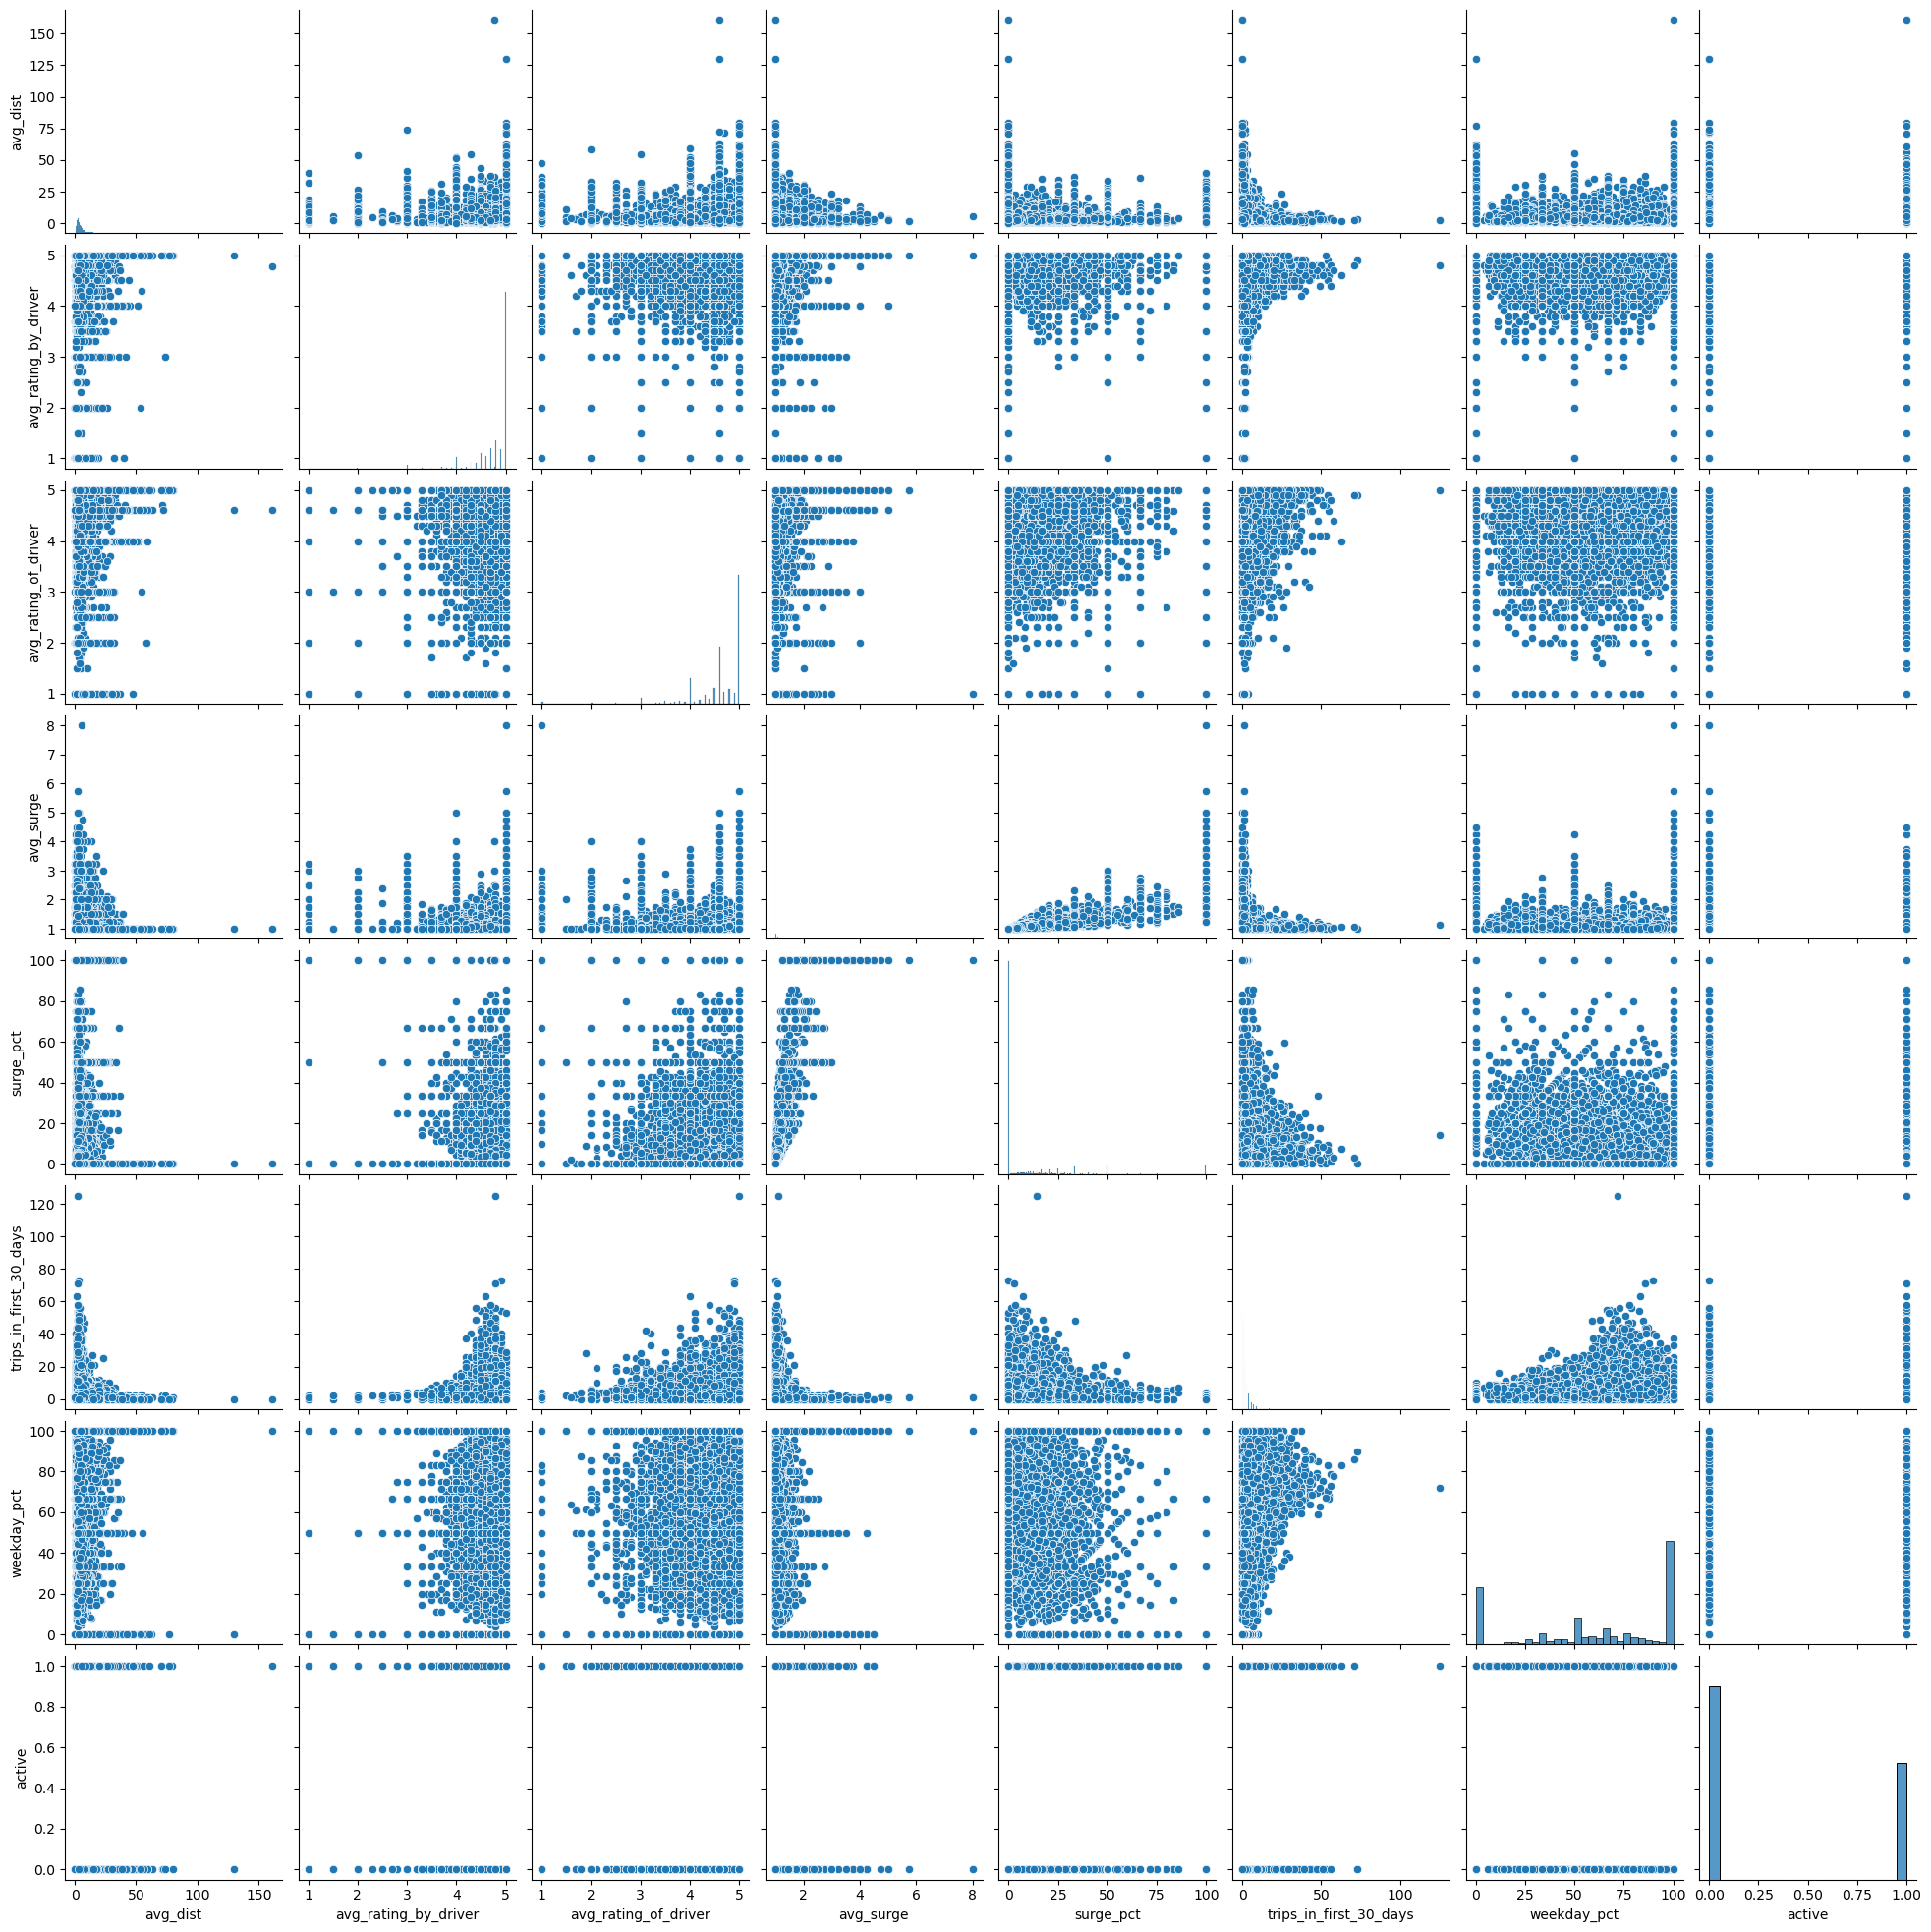

In [65]:
import seaborn as sns 

# Select only continuous variables
continuous_vars = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 
                   'avg_surge', 'surge_pct', 'trips_in_first_30_days', 
                   'weekday_pct', 'active']
df_continuous = df[continuous_vars]

# Plot pairplot
sns.pairplot(df_continuous);

In [68]:
#Encode Variables 
df = pd.get_dummies(df)
df.head()

# Convert True/False to 1/0
df = df.astype(int)

df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone
0,4,4,1,15,1,46,3,5,1,0,1,0,0,1
1,0,5,1,0,0,50,8,5,0,1,0,0,1,0
2,3,4,1,0,0,100,0,5,0,1,0,0,0,1
3,9,4,1,20,1,80,2,4,1,0,1,0,0,1
4,14,4,1,11,0,82,3,4,0,0,0,1,1,0


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.neighbors import KNeighborsClassifier

#seperate data and labels
data = df.drop('active', axis=1)
labels = df.active

#split .33 to .67
X_train, y_train, X_test, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

#normalize both sets post-split
X_train = normalize(X_train)
y_train = normalize(y_train)

In [71]:
#lets try the out of the box classifier with 10 neighbors
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, X_test)

#test the accuracy
knn.score(y_train, y_test)

0.7483030303030302

Accuracy could be better. We can now tune the parameters.

In [72]:
from sklearn.model_selection import GridSearchCV

#specify a parameter grid to search over
parameters = {
    'n_neighbors': [10, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

# Create a GridSearchCV object
knn_cv = GridSearchCV(estimator=knn, param_grid=parameters, cv=5)

# Fit the GridSearchCV object to training data
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=10),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [10, 13, 15],
                         'weights': ['uniform', 'distance']})

In [73]:
#Check Best Params
knn_cv.best_params_

{'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

In [74]:
#Reclassify Accuracy
knn_cv.score(y_train, y_test)

0.7613939393939394

Slight improvement in accuracy

##### Model Performance

In [79]:
from sklearn.metrics import classification_report, confusion_matrix

#predict classifiers
y_pred = knn_cv.predict(y_train)

print(classification_report(y_test, y_pred)) 

cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82     10305
           1       0.72      0.60      0.65      6195

    accuracy                           0.76     16500
   macro avg       0.75      0.73      0.74     16500
weighted avg       0.76      0.76      0.76     16500

confusion matrix:
[[8856 1449]
 [2488 3707]]


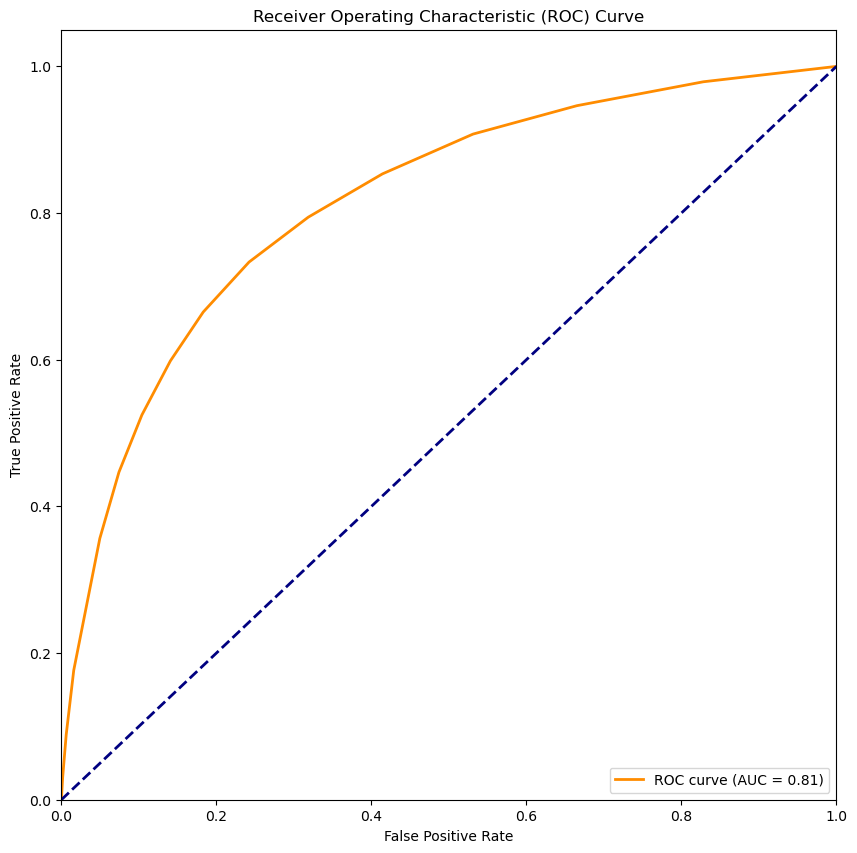

AUC score: 0.8149367769706753


In [85]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get predicted probabilities for positive class
y_probas = knn_cv.predict_proba(y_train)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probas)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print AUC score
print('AUC score: {}'.format(roc_auc_score(y_test, y_probas)))


This ROC curve visualizes the performance of the model in distinguishing between active and inactive users. The AUC score, which measures the area under the ROC curve, indicates that this model performs approximately 25% better than random chance in predicting whether users will be active in the 6th month.

To put this into perspective, imagine flipping a coin at random to make predictions. This model provides a significant improvement over such random guessing, with an accuracy equivalent to rolling a 4-sided dice where 3 out of 4 rolls result in a correct prediction.


#### Feature Importance of Model

In [86]:
from sklearn.model_selection import cross_val_score

#to be used as index for feature number
n_feats = data.shape[1]

#loop over each feature, cross validate and print score
print('Feature  Accuracy')
for i in range(n_feats):
    X = data.iloc[:, i].values.reshape(-1, 1)
    knn_feat_test = KNeighborsClassifier(n_neighbors=13, weights='uniform', metric='manhattan')
    scores = cross_val_score(knn_feat_test, X, labels)
    print('%d        %g' % (i, scores.mean()))

Feature  Accuracy
0        0.62906
1        0.61856
2        0.62392
3        0.71126
4        0.62644
5        0.71856
6        0.59966
7        0.62392
8        0.62392
9        0.66482
10        0.62392
11        0.62392
12        0.56694


In [ ]:
#subset active and inactive users for feature 7
feat_7_active = df.weekday_pct.loc[df['active'] == 1]
feat_7_inactive = df.weekday_pct.loc[df['active'] == 0]

plt.figure(figsize=(10,5))

#plot
feat_7_inactive.plot(kind='hist')
feat_7_active.plot(kind='hist', alpha=0.5)
plt.legend(['inactive', 'active'])
plt.title('weekday_pct for users active @ 6 months' )

The user behavior analysis revealed interesting patterns regarding the predictors of user activity at the 6-month mark. For both classes of users, there exists a subset who predominantly ride either during weekdays or weekends. However, a significant finding was that users exhibiting a mix of weekday and weekend activity were more likely to remain active at the 6-month mark.

Furthermore, the model's ability to identify users who became inactive at the 6-month mark suggests that individuals who exclusively ride on weekends or weekdays may be at a higher risk of discontinuing their usage.

In contrast, the interpretation of features 3 and 4 (average surge multiplier and surge percentage) is more challenging. Without a comprehensive understanding of their contextual significance within the dataset, it is difficult to provide a meaningful explanation for their impact on the model's predictive performance. Further investigation and analysis are needed to elucidate their precise implications